## Homework: Damped Oscillator

### 108022120 李泓嶔

In [36]:
import numpy as np
import matplotlib.pyplot as plt

## Damped Oscillator

According to wiki, the balance of forces for damped harmonic oscillators is then

$$
    F = -kx - b\frac{dx}{dt} = m\frac{d^2 x}{dt^2}
$$

which can be written into the form

$$
    \frac{d^2 x}{dt^2} + 2\beta\frac{dx}{dt} + \omega_0^2 x = 0
$$

where $\omega_0 = \sqrt{\frac{k}{m}}$ is called the "undamped angular frequency of oscillator", $\beta = \frac{b}{2m}$ is called the "damping parameter."

We can derive the general equation of motion for damped oscillators below

$$
    x(t) = e^{-\beta t} [A_1 exp(\sqrt{\beta^2 - \omega_0^2} t) + A_2 exp(-\sqrt{\beta^2 - \omega_0^2} t)]
$$

There are three general cases of interest:

Underdamping:     $\omega_0^2 > \beta^2$

Critical damping:     $\omega_0^2 = \beta^2$

Overdamping:     $\omega_0^2 < \beta^2$


In underdamping case, we can convert our equation into

$$
    x(t) = A e^{-\beta t} cos(\sqrt{\omega_0^2 - \beta^2} t - \delta).
$$

In Critical damping case, we can convert our equation into

$$
    x(t) = (A + Bt)e^{-\beta t}.
$$

And for Overdamping, the equation still be the same.

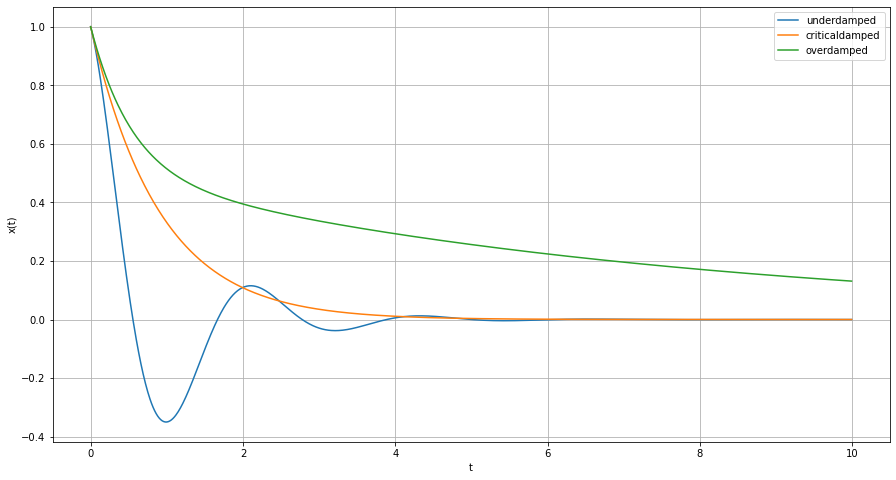

In [37]:
m = 1
k1 = 9
k2 = 1
k3 = 0.25
beta = 1
A1 = 0.5
A2 = 0.5
A = (A1 + A2)
B = -0.1

delta = 0
omega1 = np.sqrt(k1/m)
omega2 = np.sqrt(k2/m)
omega3 = np.sqrt(k3/m)

t = []
x1 = []
x2 = []
x3 = []

def X(T,omega):
    if beta < omega:
        xx = A*np.exp(-beta*T)*np.cos(np.sqrt(omega*omega - beta*beta)*T-delta)
        return xx
    elif beta == omega:
        xx = (A+B*T)*np.exp(-beta*T)
        return xx
    else:
        xx = np.exp(-beta*T)*(A1*np.exp(np.sqrt(beta*beta-omega*omega)*T)+A2*np.exp(-np.sqrt(beta*beta-omega*omega)*T))
        return xx

for i in range (0,1000):
    t.append(i/100)
    x1.append(X(t[i],omega1))
    x2.append(X(t[i],omega2))
    x3.append(X(t[i],omega3))

fig, ax = plt.subplots(figsize=(15,8))
ax.plot(t, x1, label = 'underdamped')
ax.plot(t, x2, label = 'criticaldamped')
ax.plot(t, x3, label = 'overdamped')
ax.set_xlabel('t')
ax.set_ylabel('x(t)')
ax.grid()
ax.legend()

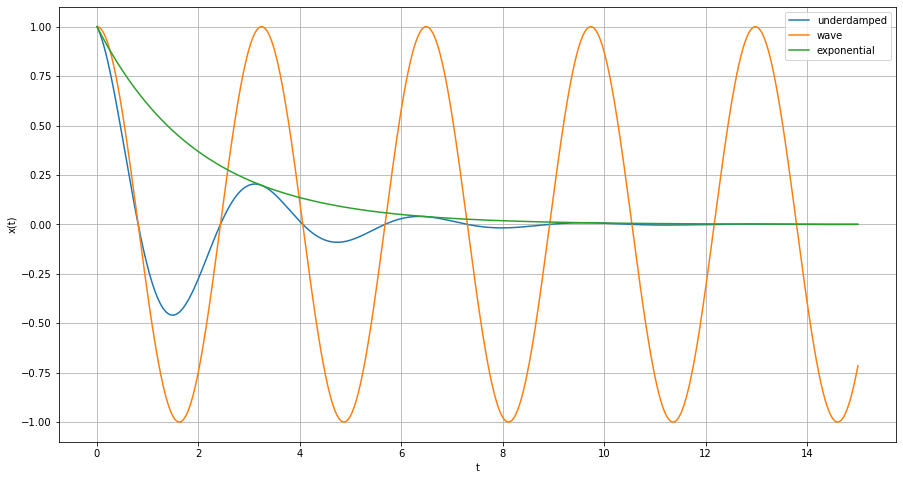

In [38]:
m = 1
k1 = 4
k2 = 1
k3 = 0.25
beta = 0.5
A1 = 0.5
A2 = 0.5
A = (A1 + A2)
B = -0.1

delta = 0
omega1 = np.sqrt(k1/m)
omega2 = np.sqrt(k2/m)
omega3 = np.sqrt(k3/m)

t = []
x1 = []
x2 = []
x3 = []

def X(T,omega):
    if beta < omega:
        xx = A*np.exp(-beta*T)*np.cos(np.sqrt(omega*omega - beta*beta)*T-delta)
        return xx
    elif beta == omega:
        xx = (A+B*T)*np.exp(-beta*T)
        return xx
    else:
        xx = np.exp(-beta*T)*(A1*np.exp(np.sqrt(beta*beta-omega*omega)*T)+A2*np.exp(-np.sqrt(beta*beta-omega*omega)*T))
        return xx

for i in range (0,1500):
    t.append(i/100)
    x1.append(X(t[i],omega1))
    x2.append(X(t[i],omega2))
    x3.append(X(t[i],omega3))

fig, ax = plt.subplots(figsize=(15,8))
ax.plot(t, x1, label = 'underdamped')
#ax.plot(t, x2, label = 'criticaldamped')
#ax.plot(t, x3, label = 'overdamped')
t1 = np.linspace(0,15,1000)
x1 = A*np.cos(np.sqrt(omega1*omega1 - beta*beta)*t1-delta)
x2 = A*np.exp(-beta*t1)
ax.plot(t1,x1, label='wave')
ax.plot(t1,x2, label = 'exponential')
ax.set_xlabel('t')
ax.set_ylabel('x(t)')
ax.grid()
ax.legend()

## Energy
From $x(t) = e^{-\beta t} [A_1 exp(\sqrt{\beta^2 - \omega_0^2} t) + A_2 exp(-\sqrt{\beta^2 - \omega_0^2} t)]$, we can obtain the velocity $\dot{x}(t) = v(t) = -\beta e^{-\beta t} [A_1 exp(\sqrt{\beta^2 - \omega_0^2} t) + A_2 exp(-\sqrt{\beta^2 - \omega_0^2} t)] + e^{-\beta t} [\sqrt{\beta^2 - \omega_0^2} A_1 exp(\sqrt{\beta^2 - \omega_0^2} t) - \sqrt{\beta^2 - \omega_0^2} A_2 exp(-\sqrt{\beta^2 - \omega_0^2} t)]$.

The kinetic energy

$$
    K = \frac{1}{2} m \dot{x}^2(t)
$$

The potential energy

$$
    U = \frac{1}{2} k x^2(t)
$$

The total energy

$$
    E = K + U
$$

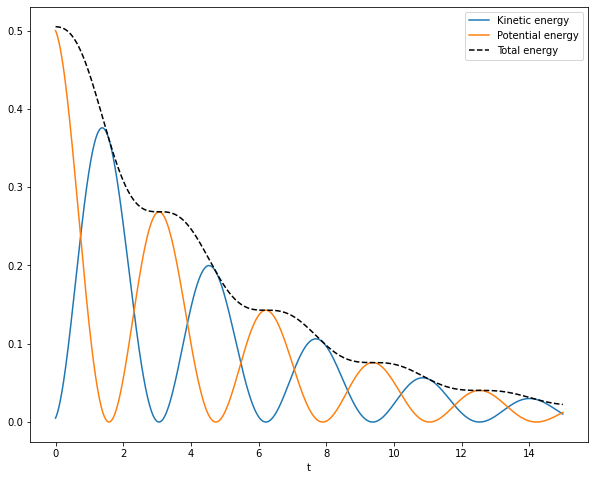

In [39]:
m = 1
k1 = 1
beta = 0.1
A1 = 0.5
A2 = 0.5
A = (A1 + A2)
B = -0.1

delta = 0
omega1 = np.sqrt(k1/m)

t = []
x = []
v = []
K = []
U = []
E = []

def X(T,omega):
    if beta < omega:
        xx = A*np.exp(-beta*T)*np.cos(np.sqrt(omega*omega - beta*beta)*T-delta)
        return xx
    else:
        xx = np.exp(-beta*T)*(A1*np.exp(np.sqrt(beta*beta-omega*omega)*T)+A2*np.exp(-np.sqrt(beta*beta-omega*omega)*T))
        return xx
def V(T,omega):
    if beta < omega:
        vv = -beta*A*np.exp(-beta*T)*np.cos(np.sqrt(omega*omega - beta*beta)*T-delta) - np.sqrt(omega*omega - beta*beta)*A*np.exp(-beta*T)*np.sin(np.sqrt(omega*omega - beta*beta)*T-delta)
        return vv
    elif beta == omega:
        vv = -beta*(A+B*T)*np.exp(-beta*T)+B*np.exp(-beta*T)
        return vv
    else:
        vv = -beta*np.exp(-beta*T)*(A1*np.exp(np.sqrt(beta*beta-omega*omega)*T)+A2*np.exp(-np.sqrt(beta*beta-omega*omega)*T)) + np.exp(-beta*T)*(np.sqrt(beta*beta-omega*omega)*A1*np.exp(np.sqrt(beta*beta-omega*omega)*T)-np.sqrt(beta*beta-omega*omega)*A2*np.exp(-np.sqrt(beta*beta-omega*omega)*T))
        return vv
    
for i in range (0,1500):
    t.append(i/100)
    x.append(X(t[i],omega1))
    v.append(V(t[i],omega1))
    tem_K = m*v[i]*v[i]/2
    K.append(tem_K)
    tem_U = k1*x[i]*x[i]/2
    U.append(tem_U)
    E.append(K[i]+U[i])

fig, ax = plt.subplots(figsize=(10,8))
ax.plot(t, K, label='Kinetic energy')
ax.plot(t, U, label='Potential energy')
ax.plot(t, E, 'k--', label='Total energy')

ax.set_xlabel('t')
ax.legend()

## Damped Oscillations in Two Dimensions

Consider the harmonic oscillation in 2D, with the equation $F_x = -kx - b\frac{dx}{dt}$ and $F_y = -ky - b\frac{dy}{dt}$. 

The equations of motions are

$$
    \frac{d^2 x}{dt^2} + 2\beta\omega_0\frac{dx}{dt} + \omega_0^2 x = 0
$$

$$
    \frac{d^2 y}{dt^2} + 2\beta\omega_0\frac{dy}{dt} + \omega_0^2 y = 0
$$

where $\omega_0 = \sqrt{\frac{k}{m}}$ is called the "undamped angular frequency of oscillator", $\beta = \frac{b}{2m}$ is called the "damping parameter."

In underdamping case, the solutions are

$$
    x(t) = A e^{-\beta t} cos(\sqrt{\omega_0^2 - \beta^2} t - \delta_1).
$$

$$
    y(t) = B e^{-\beta t} cos(\sqrt{\omega_0^2 - \beta^2} t - \delta_2).
$$

where $A, B, \delta_1$ and $\delta_2$ are determined by the initial conditions.

(-1.0, 1.0)

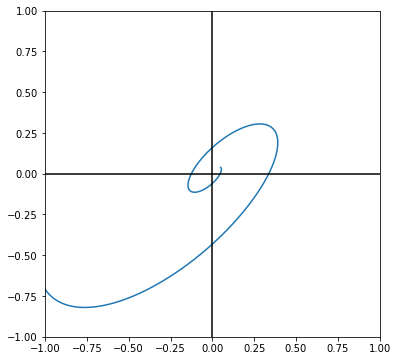

In [49]:
k = 1
m = 1
omega = np.sqrt(k/m)
A = 1
B = 1
delta = np.pi/4
alpha = np.pi/2
beta = alpha + delta
zeta = 0.3

t = []
x = []
y = []

if zeta <= 1:
    def X(T):
        xx = A*np.exp(-zeta*omega*T)*np.sin(np.sqrt(1-zeta*zeta)*omega*T-alpha)
        return xx
else:
    def X(T):
        xx = A*np.exp(-zeta*omega*T)
        return xx

if zeta <= 1:
    def Y(T):
        yy = B*np.exp(-zeta*omega*T)*np.sin(np.sqrt(1-zeta*zeta)*omega*T-beta)
        return yy
else:
    def Y(T):
        yy = B*np.exp(-zeta*omega*T)
        return yy

for i in range(1000):
    t.append(i/100)
    x.append(X(t[i]))
    y.append(Y(t[i]))

fig, ax = plt.subplots(figsize=(6,6))
ax.plot(x, y)
ax.plot([-A, +A], [0, 0], 'k')
ax.plot([0, 0], [-B, +B], 'k')
ax.set_xlim([-A, +A])
ax.set_ylim([-B, +B])

We can use different $\delta$ to plot different 2D oscillations.

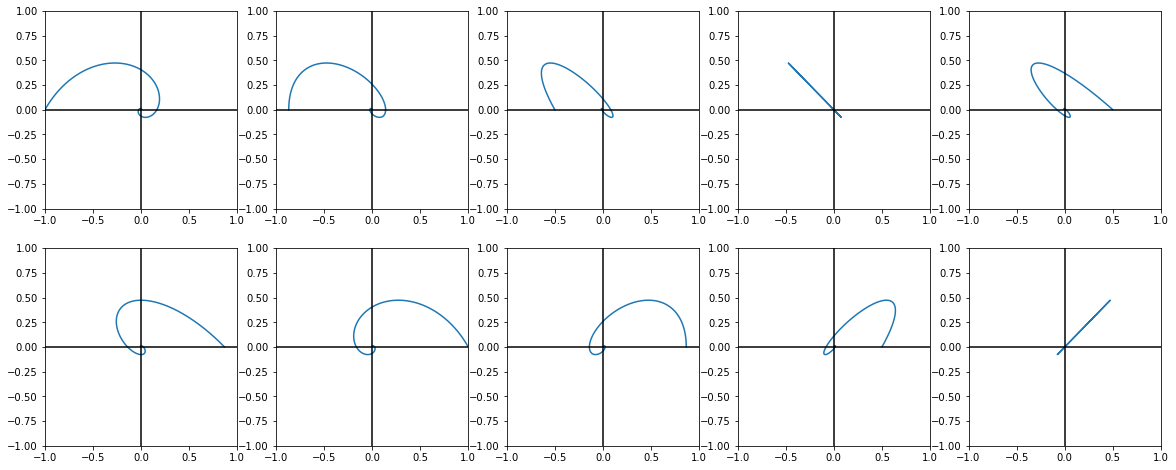

In [50]:
k = 1.
m = 1.
omega = np.sqrt(k/m)
A = 1.
B = 1.
c = 1
zeta = c/(2*np.sqrt(k*m))

alpha = 0

beta = 0.
delta = np.array([90, 120, 150, 180, 210, 240, 270, 300, 330, 360])/180.*np.pi

if zeta <= 1:
    def X(T):
        xx = A*np.exp(-zeta*omega*T)*np.sin(np.sqrt(1-zeta*zeta)*omega*T-alpha)
        return xx
else:
    def X(T):
        xx = A*np.exp(-zeta*omega*T)
        return xx

if zeta <= 1:
    def Y(T):
        yy = B*np.exp(-zeta*omega*T)*np.sin(np.sqrt(1-zeta*zeta)*omega*T-beta)
        return yy
else:
    def Y(T):
        yy = B*np.exp(-zeta*omega*T)
        return yy

fig, ax = plt.subplots(ncols=5, nrows=2, figsize=(4*5, 4*2))
ax = ax.flatten()

for j in range(10):
    alpha = beta + delta[j]
    t = []
    x = []
    y = []
    for i in range(1000):
        t.append(i/100)
        x.append(X(t[i]))
        y.append(Y(t[i]))
    ax[j].plot(x, y)
    ax[j].plot([-A, +A], [0, 0], 'k')
    ax[j].plot([0, 0], [-B, +B], 'k')
    ax[j].set_xlim([-A, +A])
    ax[j].set_ylim([-B, +B])

## Lissajour curve in Damped Oscillaion

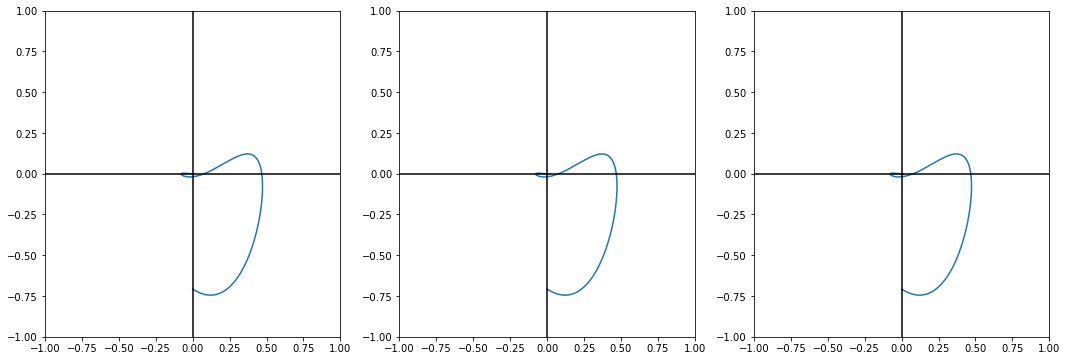

In [51]:
A = 1.
B = 1.
omegax = 1.
omegay = 2*omegax
c = 1
zeta = c/(2*np.sqrt(k*m))

alpha1 = 0
alpha2 = np.pi*3/4
delta = np.array([0., np.pi/3, np.pi/2])

if zeta <= 1:
    def X(T):
        xx = A*np.exp(-zeta*omegax*T)*np.sin(np.sqrt(1-zeta*zeta)*omegax*T-alpha1)
        return xx
else:
    def X(T):
        xx = A*np.exp(-zeta*omegax*T)
        return xx

if zeta <= 1:
    def Y(T):
        yy = B*np.exp(-zeta*omegay*T)*np.sin(np.sqrt(1-zeta*zeta)*omegay*T-alpha2)
        return yy
else:
    def Y(T):
        yy = B*np.exp(-zeta*omegay*T)
        return yy

fig, ax = plt.subplots(ncols=3, figsize=(6*3, 6))
ax = ax.flatten()

for i in range(3):
    alpha = beta + delta[i]
    t = []
    x = []
    y = []
    for j in range(1000):
        t.append(j/100)
        x.append(X(t[j]))
        y.append(Y(t[j]))
    ax[i].plot(x, y)
    ax[i].plot([-A, +A], [0, 0], 'k')
    ax[i].plot([0, 0], [-B, +B], 'k')
    ax[i].set_xlim([-A, +A])
    ax[i].set_ylim([-B, +B])

### Phase diagrams

We may consider the quantities $(x(t), \dot{x}(t))$ to be the coordinates of a point in a two-dimensional "phase space".

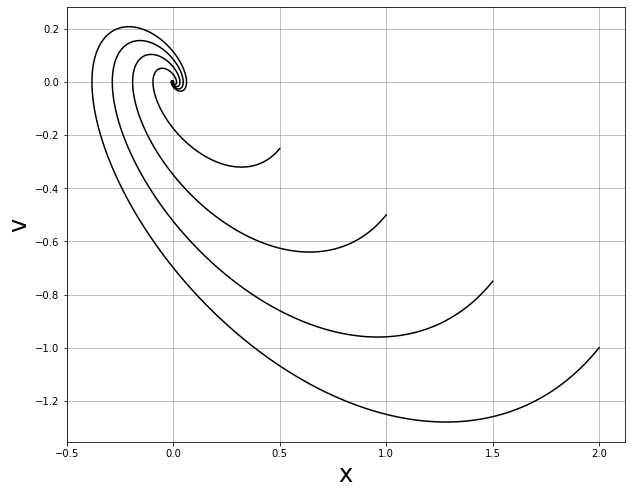

In [64]:
k = 1.
m = 1.
def OM(k1):
    omega = np.sqrt(k1/m)
    return omega
beta = 0.5
delta = 0
def X(T,omega,a1,a2):
    if beta < omega:
        xx = A*np.exp(-beta*T)*np.cos(np.sqrt(omega*omega - beta*beta)*T-delta)
        return xx
    elif beta == omega:
        xx = (A+B*T)*np.exp(-beta*T)
        return xx
    else:
        xx = np.exp(-beta*T)*(a1*np.exp(np.sqrt(beta*beta-omega*omega)*T)+a2*np.exp(-np.sqrt(beta*beta-omega*omega)*T))
        return xx

def V(T,omega,a1,a2):
    if beta < omega:
        vv = -beta*A*np.exp(-beta*T)*np.cos(np.sqrt(omega*omega - beta*beta)*T-delta) - np.sqrt(omega*omega - beta*beta)*A*np.exp(-beta*T)*np.sin(np.sqrt(omega*omega - beta*beta)*T-delta)
        return vv
    elif beta == omega:
        vv = -beta*(A+B*T)*np.exp(-beta*T)+B*np.exp(-beta*T)
        return vv
    else:
        vv = -beta*np.exp(-beta*T)*(a1*np.exp(np.sqrt(beta*beta-omega*omega)*T)+a2*np.exp(-np.sqrt(beta*beta-omega*omega)*T)) + np.exp(-beta*T)*(np.sqrt(beta*beta-omega*omega)*a1*np.exp(np.sqrt(beta*beta-omega*omega)*T)-np.sqrt(beta*beta-omega*omega)*a2*np.exp(-np.sqrt(beta*beta-omega*omega)*T))
        return vv

fig, ax = plt.subplots(figsize=(10,8))
for A in [0.5, 1.0, 1.5, 2.0]:
    t = []
    x = []
    v = []
    for j in range (1500):
        t.append(j/100)
        x.append(X(t[j],OM(1),1,1))
        v.append(V(t[j],OM(1),1,1))
    ax.plot(x, v, 'k')

ax.set_xlabel('x', fontsize=24)
ax.set_ylabel('v', fontsize=24)
ax.grid()

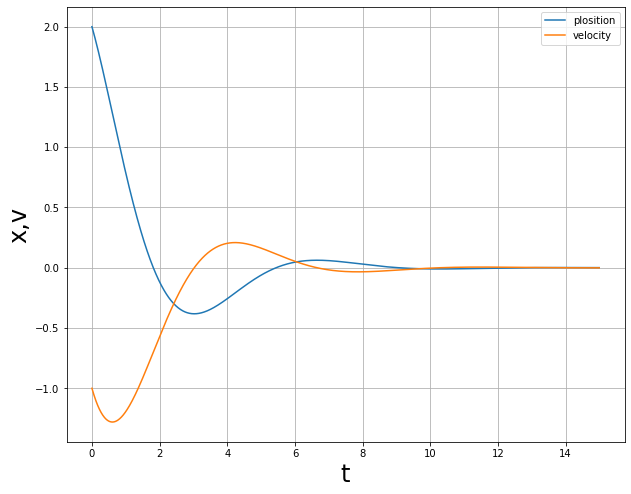

In [65]:
beta = 0.5
fig, ay = plt.subplots(figsize = (10,8))
ay.plot(t,x, label='plosition')
ay.plot(t,v, label='velocity')
ay.set_xlabel('t',fontsize=24)
ay.set_ylabel('x,v',fontsize=24)
ay.legend()
ay.grid()

## The graph below is the phase diagram of overdamping

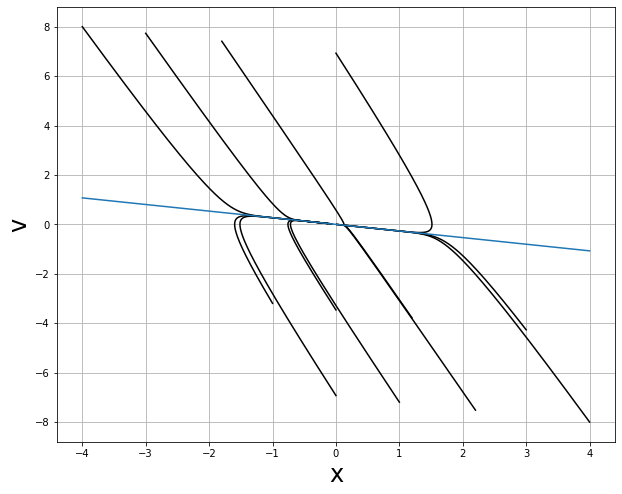

In [66]:
k = 1.
m = 1.
def OM(k1):
    omega = np.sqrt(k1/m)
    return omega
beta = 2
delta = 0
def X(T,omega,a1,a2):
    if beta < omega:
        xx = A*np.exp(-beta*T)*np.cos(np.sqrt(omega*omega - beta*beta)*T-delta)
        return xx
    elif beta == omega:
        xx = (A+B*T)*np.exp(-beta*T)
        return xx
    else:
        xx = np.exp(-beta*T)*(a1*np.exp(np.sqrt(beta*beta-omega*omega)*T)+a2*np.exp(-np.sqrt(beta*beta-omega*omega)*T))
        return xx

def V(T,omega,a1,a2):
    if beta < omega:
        vv = -beta*A*np.exp(-beta*T)*np.cos(np.sqrt(omega*omega - beta*beta)*T-delta) - np.sqrt(omega*omega - beta*beta)*A*np.exp(-beta*T)*np.sin(np.sqrt(omega*omega - beta*beta)*T-delta)
        return vv
    elif beta == omega:
        vv = -beta*(A+B*T)*np.exp(-beta*T)+B*np.exp(-beta*T)
        return vv
    else:
        vv = -beta*np.exp(-beta*T)*(a1*np.exp(np.sqrt(beta*beta-omega*omega)*T)+a2*np.exp(-np.sqrt(beta*beta-omega*omega)*T)) + np.exp(-beta*T)*(np.sqrt(beta*beta-omega*omega)*a1*np.exp(np.sqrt(beta*beta-omega*omega)*T)-np.sqrt(beta*beta-omega*omega)*a2*np.exp(-np.sqrt(beta*beta-omega*omega)*T))
        return vv

fig, ax = plt.subplots(figsize=(10,8))
for a11 in [-2, -1,0.2, 2]:
    for a22 in [-2,1,2]:
        t = []
        x = []
        v = []
        for j in range (1000):
            t.append(j/100)
            x.append(X(t[j],OM(1),a11,a22))
            v.append(V(t[j],OM(1),a11,a22))
        ax.plot(x, v, 'k',)
x1 = np.linspace(-4,4)
v1 = -(beta-np.sqrt(beta*beta-OM(1)*OM(1)))*x1
ax.plot(x1,v1,'-')

ax.set_xlabel('x', fontsize=24)
ax.set_ylabel('v', fontsize=24)
ax.grid()